In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
# datascience version number of last run of this notebook
version.__version__

'0.10.1'

In [2]:
import urllib.request as urlreq
import re

max_enroller = re.compile('"maxEnroll":[0123456789]*,')
enroller = re.compile('"enrolledCount":[0123456789]*,')
wait_lister = re.compile('"waitlistedCount":[0123456789]*,')
def current_enrollment(schedule_url):
    rdr = urlreq.urlopen(schedule_url)
    page = rdr.read(100000).decode('utf-8')
    max_enroll = int(max_enroller.search(page).group()[12:-1])
    enrolled = int(enroller.search(page).group()[16:-1])
    waitlisted = int(wait_lister.search(page).group()[18:-1])
    return max_enroll, enrolled, waitlisted

def lookup_row(row):
    course, kind, url = row
    # print(url)
    limit, enroll, wait = current_enrollment(url)
    return (course, kind, enroll+wait, limit, enroll, wait)

def lookup_courses(watch):
    return Table(["Course", "Kind", "Registered", "Limit", "Enrolled", "Waitlisted"]).with_rows(
        [lookup_row(row) for row in watch.rows])

In [3]:
url_watch = Table(["Course", "Kind", "URL"]).with_rows([
    ("Data8","Foundation","http://classes.berkeley.edu/content/2017-fall-compsci-c8-001-lec-001"),
    ("DS100","Gateway","http://classes.berkeley.edu/content/2017-fall-stat-c100-001-lec-001"),
    ("stat88","Connector","http://classes.berkeley.edu/content/2017-fall-stat-88-001-lec-001"),
    ("CEE88","Connector","http://classes.berkeley.edu/content/2017-fall-civeng-88-001-lec-001"),
    ("demog88 immigration","Connector","http://classes.berkeley.edu/content/2017-fall-demog-88-001-lec-001"),
    ("LS88-1 social nets","Connector","http://classes.berkeley.edu/content/2017-fall-ls-88-001-sem-001"),
    ("LS88-2 web data vis","Connector","http://classes.berkeley.edu/content/2017-fall-ls-88-002-sem-002"),
    ("LS88-3 cog neuro","Connector","http://classes.berkeley.edu/content/2017-fall-ls-88-003-sem-003"),
    ("LS88-4 econ dev","Connector","http://classes.berkeley.edu/content/2017-fall-ls-88-004-sem-004"),
    ("LS88-5 text","Connector","http://classes.berkeley.edu/content/2017-fall-ls-88-005-sem-005"),
    ("BIOENG 145","Extend","http://classes.berkeley.edu/content/2017-fall-bioeng-145-001-lec-001"),
    ("COGSCI 190","Extend","http://classes.berkeley.edu/content/2017-fall-cogsci-190-001-sem-001"),
    ("DEMOG 110","Extend","http://classes.berkeley.edu/content/2017-fall-demog-110-001-lec-001"),
    ("ESPM 157","Extend","http://classes.berkeley.edu/content/2017-fall-espm-157-001-lab-001"),
    ("INDENG 135","Extend","http://classes.berkeley.edu/content/2017-fall-indeng-135-001-lec-001"),
    ("INDENG 142","Extend","http://classes.berkeley.edu/content/2017-fall-indeng-142-001-lec-001"),
    ("INFO 159","Extend","http://classes.berkeley.edu/content/2017-fall-info-159-001-lec-001"),
    ("INFO 190-1","Extend","http://classes.berkeley.edu/content/2017-fall-info-190-001-sem-001"),
    ("STAT 133","Upper","http://classes.berkeley.edu/content/2017-fall-stat-133-001-lec-001"),
    ("STAT 154","Upper","http://classes.berkeley.edu/content/2017-fall-stat-154-001-lec-001"),
    ("COMPSCI 189","Upper","http://classes.berkeley.edu/content/2017-fall-compsci-189-001-lec-001"),
])
url_watch.show()

Course,Kind,URL
Data8,Foundation,http://classes.berkeley.edu/content/2017-fall-compsci-c8 ...
DS100,Gateway,http://classes.berkeley.edu/content/2017-fall-stat-c100- ...
stat88,Connector,http://classes.berkeley.edu/content/2017-fall-stat-88-00 ...
CEE88,Connector,http://classes.berkeley.edu/content/2017-fall-civeng-88- ...
demog88 immigration,Connector,http://classes.berkeley.edu/content/2017-fall-demog-88-0 ...
LS88-1 social nets,Connector,http://classes.berkeley.edu/content/2017-fall-ls-88-001- ...
LS88-2 web data vis,Connector,http://classes.berkeley.edu/content/2017-fall-ls-88-002- ...
LS88-3 cog neuro,Connector,http://classes.berkeley.edu/content/2017-fall-ls-88-003- ...
LS88-4 econ dev,Connector,http://classes.berkeley.edu/content/2017-fall-ls-88-004- ...
LS88-5 text,Connector,http://classes.berkeley.edu/content/2017-fall-ls-88-005- ...


In [4]:
# Execute this cell to get fetch the current enrollments from schedule
current_enrollments = lookup_courses(url_watch)

In [5]:
current_enrollments.show()

Course,Kind,Registered,Limit,Enrolled,Waitlisted
Data8,Foundation,"1,027","1,190","1,027",0
DS100,Gateway,264,274,264,0
stat88,Connector,140,148,140,0
CEE88,Connector,57,60,57,0
demog88 immigration,Connector,18,30,18,0
LS88-1 social nets,Connector,32,32,32,0
LS88-2 web data vis,Connector,32,32,32,0
LS88-3 cog neuro,Connector,27,32,27,0
LS88-4 econ dev,Connector,27,32,27,0
LS88-5 text,Connector,22,40,22,0


In [6]:
by_group = current_enrollments.group('Kind', collect=sum)
by_group

Kind,Course sum,Registered sum,Limit sum,Enrolled sum,Waitlisted sum
Connector,,355,406,355,0
Extend,,332,417,327,5
Foundation,,"1,027","1,190","1,027",0
Gateway,,264,274,264,0
Upper,,651,752,649,2


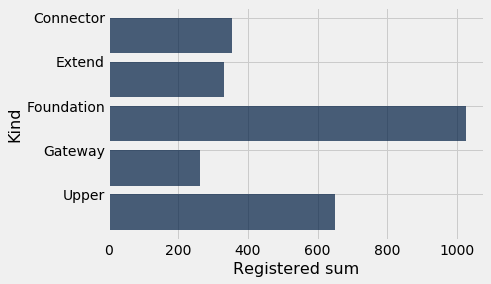

In [7]:
by_group.barh('Kind', 'Registered sum')

In [8]:
sum(by_group['Registered sum'])

2629

In [9]:
connectors = current_enrollments.where('Kind', 'Connector')
connectors

Course,Kind,Registered,Limit,Enrolled,Waitlisted
stat88,Connector,140,148,140,0
CEE88,Connector,57,60,57,0
demog88 immigration,Connector,18,30,18,0
LS88-1 social nets,Connector,32,32,32,0
LS88-2 web data vis,Connector,32,32,32,0
LS88-3 cog neuro,Connector,27,32,27,0
LS88-4 econ dev,Connector,27,32,27,0
LS88-5 text,Connector,22,40,22,0


In [10]:
sum(connectors['Registered'])

355

In [11]:
sum(connectors['Registered'])/current_enrollments.where('Course', 'Data8')['Registered'][0]

0.34566699123661149

In [12]:
sum(current_enrollments.where('Kind', 'Extend')['Registered'])

332

In [13]:
current_enrollments.where(np.in1d(current_enrollments['Course'], 
                                  ['STAT 154', 'COMPSCI 189', 'INDENG 142']))

Course,Kind,Registered,Limit,Enrolled,Waitlisted
INDENG 142,Extend,59,75,59,0
STAT 154,Upper,76,74,74,2
COMPSCI 189,Upper,276,374,276,0


In [14]:
current_enrollments.where(np.in1d(current_enrollments['Course'], 
                                  ['STAT 154', 'COMPSCI 189', 'INDENG 142'])).stats()

statistic,Course,Kind,Registered,Limit,Enrolled,Waitlisted
min,COMPSCI 189,Extend,59,74,59,0
max,STAT 154,Upper,276,374,276,2
median,,,76,75,74,0
sum,,,411,523,409,2
